

[github notebook](https://github.com/PacktPublishing/Deep-Learning-with-PyTorch/blob/master/Chapter05/Understanding%20Convolutions%20and%20building%20an%20MNIST%20image%20classifier.ipynb)

In [3]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.autograd import Variable
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
is_cuda = False
if torch.cuda.is_available():
    is_cuda = True

In [7]:
# 数据的转换
transformation = transforms.Compose([transforms.ToTensor(),
                                      transforms.Normalize((0.1307,),
                                                           (0.3081,))])
# 训练的数据集
train_dataset = datasets.MNIST('data/',train=True,transform=transformation,download=True)
test_dataset = datasets.MNIST('data/', train=False, transform=transformation,download=True)

train_loader = torch.utils.data.DataLoader(train_dataset,batch_size=32,shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset,batch_size=32,shuffle=True)


In [8]:
# 获取到迭代的数据
sample_data = next(iter(train_loader))

In [12]:
def plot_img(image):
    image = image.numpy()[0]
    mean = 0.1307
    std = 0.3081
    image = ((mean * image) + std)
    plt.imshow(image,cmap='gray')

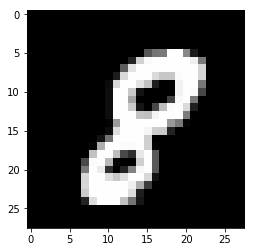

In [13]:
plot_img(sample_data[0][2])

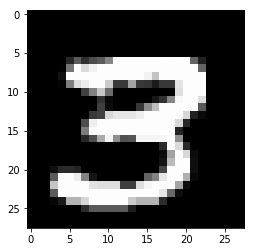

In [14]:
plot_img(sample_data[0][1])

In [24]:
class Net(nn.Module):
    # 定义网络
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1,10,kernel_size=5)
        self.conv2 = nn.Conv2d(10,20,kernel_size=5)
        self.conv2_drop = nn.Dropout2d()  # drop out
        self.fc1 = nn.Linear(320, 50)
        self.fc2 = nn.Linear(50, 10)
    
    # 定义前项
    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
        x = x.view(-1, 320)
        x = F.relu(self.fc1(x))
        #x = F.dropout(x,p=0.1, training=self.training)
        x = self.fc2(x)
        return F.log_softmax(x,dim=1)

In [17]:
model = Net()
if is_cuda:
    model.cuda()

In [18]:
optimizer = optim.SGD(model.parameters(), lr=0)

In [19]:
data, target = next(iter(train_loader))

In [20]:
output = model(Variable(data.cuda()))

In [21]:
output.size()

torch.Size([32, 10])

In [22]:
target.size()

torch.Size([32])

In [23]:
def fit():
    if phase == 'training':  # 如果是试验阶段
        model.train()
    if phase == 'validation':  # 如果是验证阶段
        model.val()
        volatile=True